COVID-19 Global Data Analysis (Python + Tableau)


Objective:

This project aims to explore and analyze the progression of the COVID-19 pandemic across the world using real data from Our World in Data. The analysis focuses on trends in daily cases, deaths, and vaccination efforts, with a deep dive into selected countries, particularly the United Kingdom.



Tools Used:

Python (Pandas, Seaborn, Matplotlib) for data wrangling, analysis, and visualization

Tableau for building interactive dashboards and maps

Dataset Source: Our World in Data COVID-19 Dataset



Key Questions Explored:

How did COVID-19 spread over time across the world?

Which countries had the highest and lowest case and death rates?

What impact did vaccination efforts have on daily case trends?



What You’ll See in This Notebook:

Data cleaning and exploration using Python

Visualizations for daily new cases, deaths, and vaccinations

Insights drawn from temporal and geographic trends

Export-ready dataset for Tableau dashboard design (shared separately)



Outcome:

This project serves as a part of my data analyst portfolio, demonstrating my ability to clean, analyze, and visualize real-world data to derive meaningful insights.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv


In [2]:
df=pd.read_csv('/kaggle/input/our-world-in-data-covid19-dataset/owid-covid-data.csv')
df.info()
df.describe()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Show missing value percentages per column
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values (%):\n", missing_percent.sort_values(ascending=False))

# Select only the key columns for initial analysis
df_small = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 
               'new_deaths', 'total_vaccinations', 'people_fully_vaccinated', 
               'population']]

# Preview the cleaned dataframe
print(df_small.head())

Missing values (%):
 weekly_icu_admissions                      97.084994
weekly_icu_admissions_per_million          97.084994
excess_mortality_cumulative_per_million    96.519702
excess_mortality                           96.519702
excess_mortality_cumulative                96.519702
                                             ...    
new_deaths_per_million                      2.734764
population                                  0.000000
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64
      location       date  total_cases  new_cases  total_deaths  new_deaths  \
0  Afghanistan 2020-01-03          NaN        0.0           NaN         0.0   
1  Afghanistan 2020-01-04          NaN        0.0           NaN         0.0   
2  Afghanistan 2020-01-05          NaN        0.0           NaN         0.0   
3  Afghanistan 2020-01-06          NaN        0.0    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
# Exclude continents and special regions
excluded_locations = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 
                      'International', 'North America', 'Oceania', 'South America']
df_small = df_small[~df_small['location'].isin(excluded_locations)]

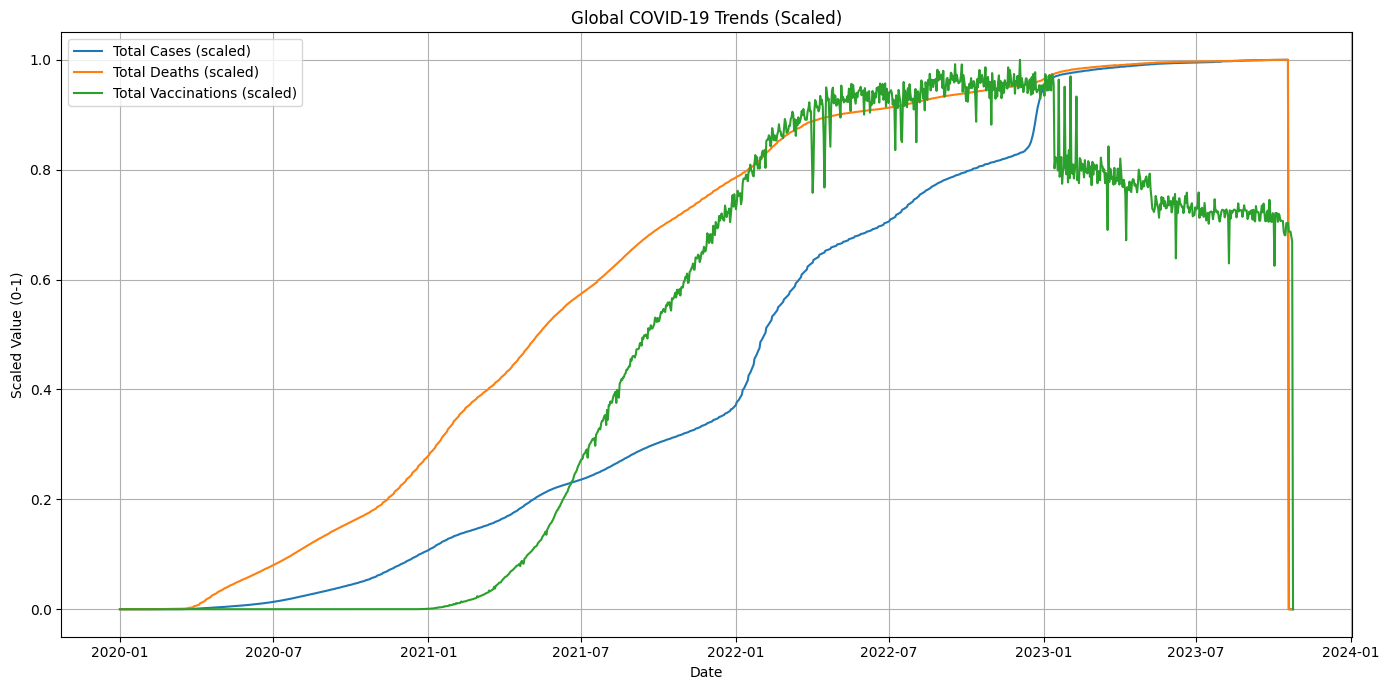

In [5]:
# Group by date and sum the values globally
global_trends = df_small.groupby('date')[['total_cases', 'total_deaths', 'total_vaccinations']].sum().reset_index()

# Min-max scaling
global_trends_scaled = global_trends.copy()
for col in ['total_cases', 'total_deaths', 'total_vaccinations']:
    global_trends_scaled[col] = (global_trends_scaled[col] - global_trends_scaled[col].min()) / (global_trends_scaled[col].max() - global_trends_scaled[col].min())

# Plot
plt.figure(figsize=(14, 7))
plt.plot(global_trends_scaled['date'], global_trends_scaled['total_cases'], label='Total Cases (scaled)')
plt.plot(global_trends_scaled['date'], global_trends_scaled['total_deaths'], label='Total Deaths (scaled)')
plt.plot(global_trends_scaled['date'], global_trends_scaled['total_vaccinations'], label='Total Vaccinations (scaled)')
plt.title('Global COVID-19 Trends (Scaled)')
plt.xlabel('Date')
plt.ylabel('Scaled Value (0-1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Filter for Germany and United Kingdom
df_compare = df_small[df_small['location'].isin(['Germany', 'United Kingdom'])]

# Sort by date just to be safe
df_compare = df_compare.sort_values(['location', 'date'])

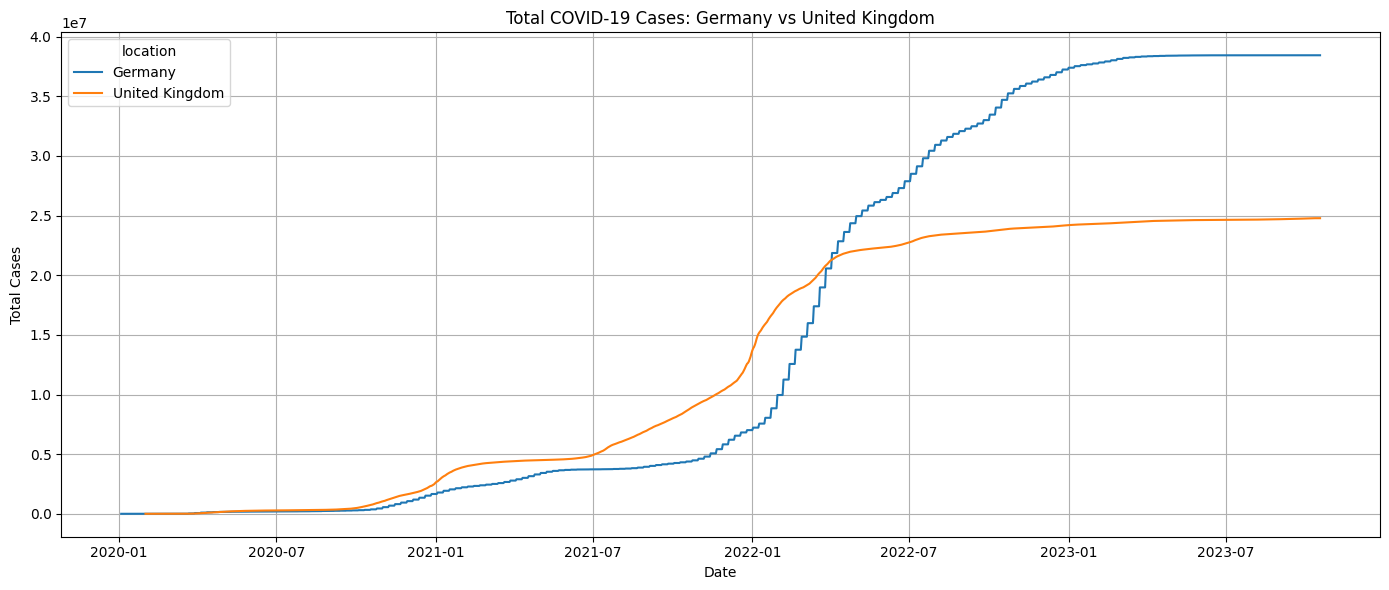

In [7]:
#Total Cases Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_compare, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases: Germany vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

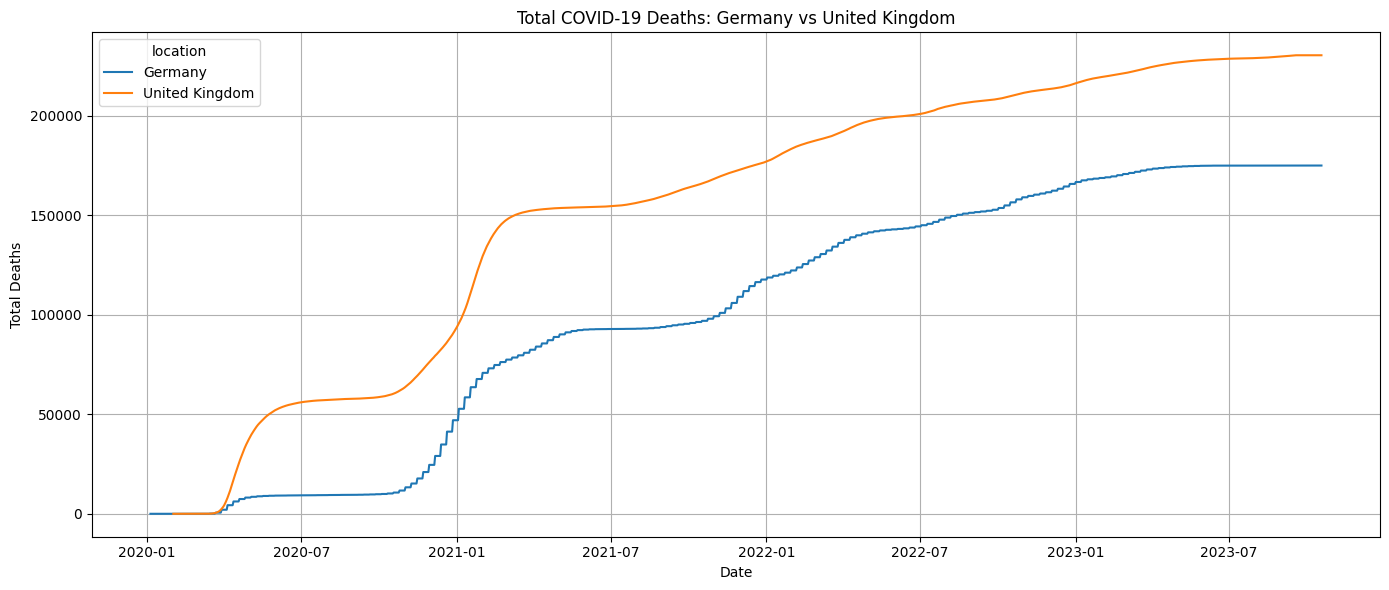

In [8]:
#Total Deaths Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_compare, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths: Germany vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


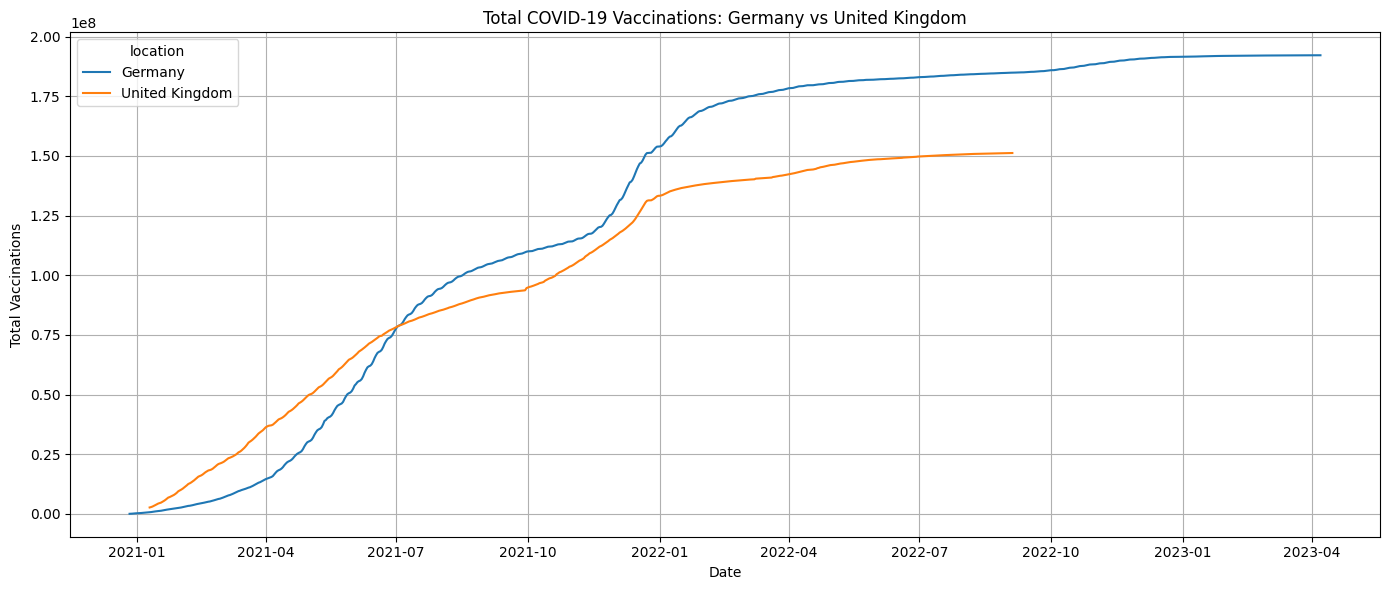

In [9]:
#Total Vaccinations Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_compare, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations: Germany vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Copy the comparison dataframe to avoid modifying the original
df_compare_percapita = df_compare.copy()

# Calculate per 100,000 metrics
df_compare_percapita['cases_per_100k'] = (df_compare_percapita['total_cases'] / df_compare_percapita['population']) * 100000
df_compare_percapita['deaths_per_100k'] = (df_compare_percapita['total_deaths'] / df_compare_percapita['population']) * 100000
df_compare_percapita['vaccinations_per_100k'] = (df_compare_percapita['total_vaccinations'] / df_compare_percapita['population']) * 100000


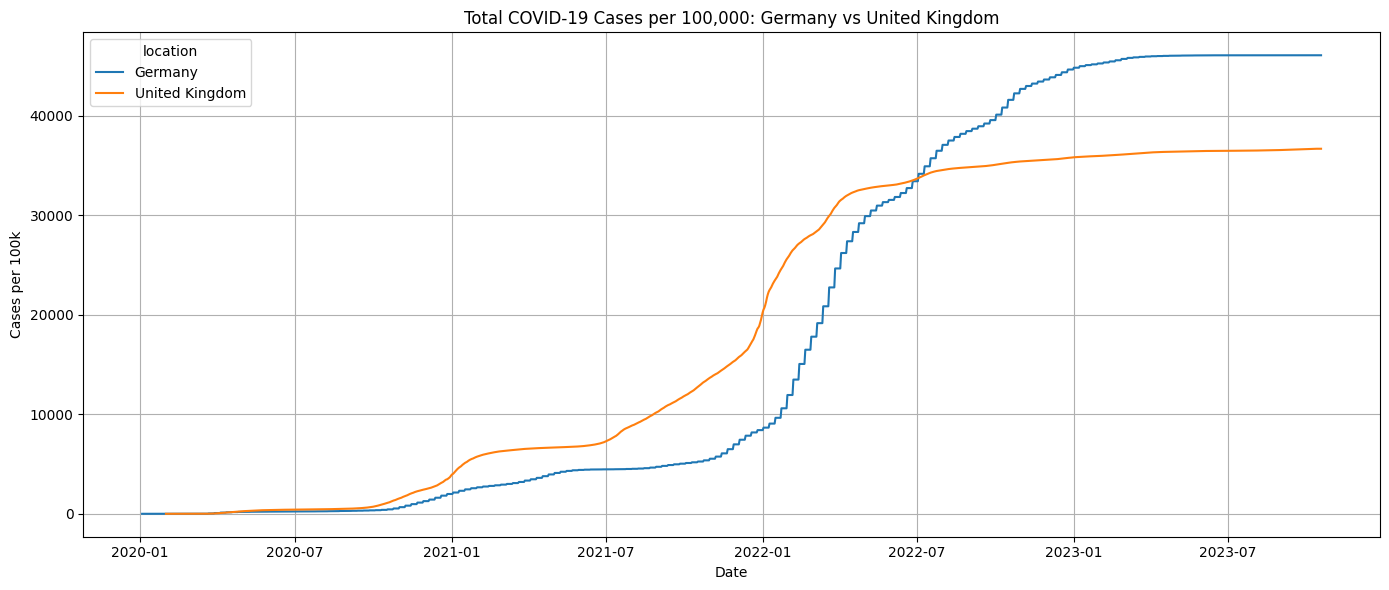

In [11]:
#Cases per 100k
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_compare_percapita, x='date', y='cases_per_100k', hue='location')
plt.title('Total COVID-19 Cases per 100,000: Germany vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('Cases per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()


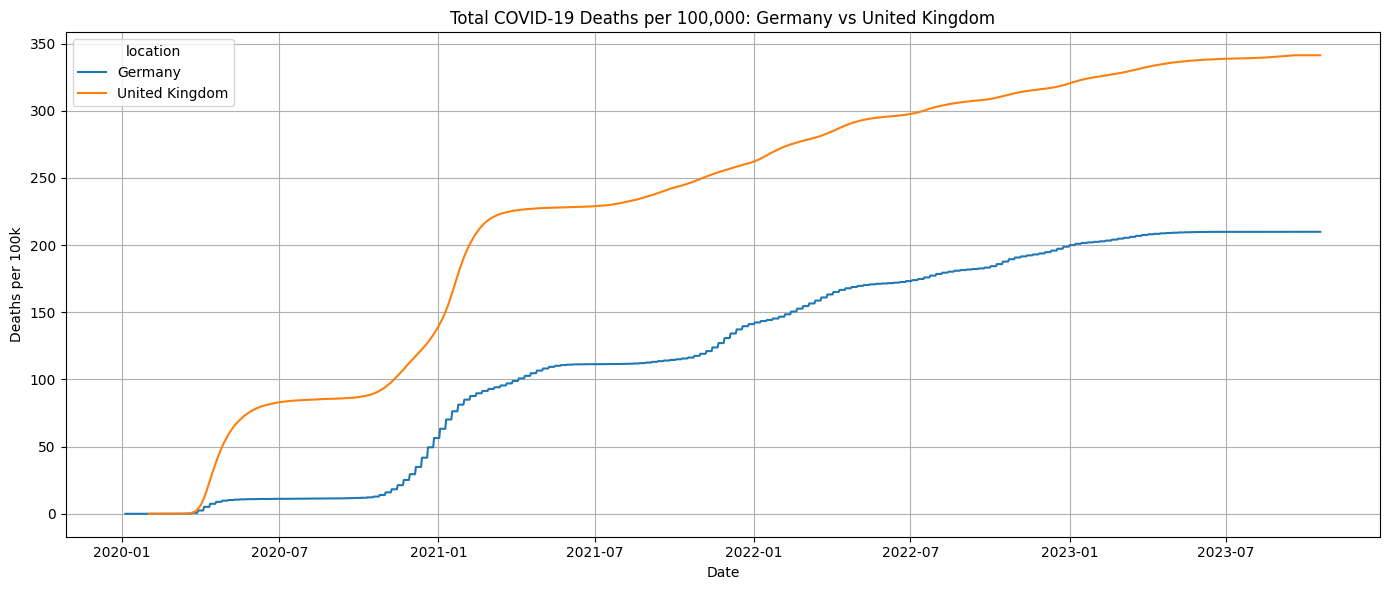

In [12]:
#Deaths per 100k
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_compare_percapita, x='date', y='deaths_per_100k', hue='location')
plt.title('Total COVID-19 Deaths per 100,000: Germany vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('Deaths per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()


***Cumulative COVID-19 Cases in the United Kingdom Over Time***

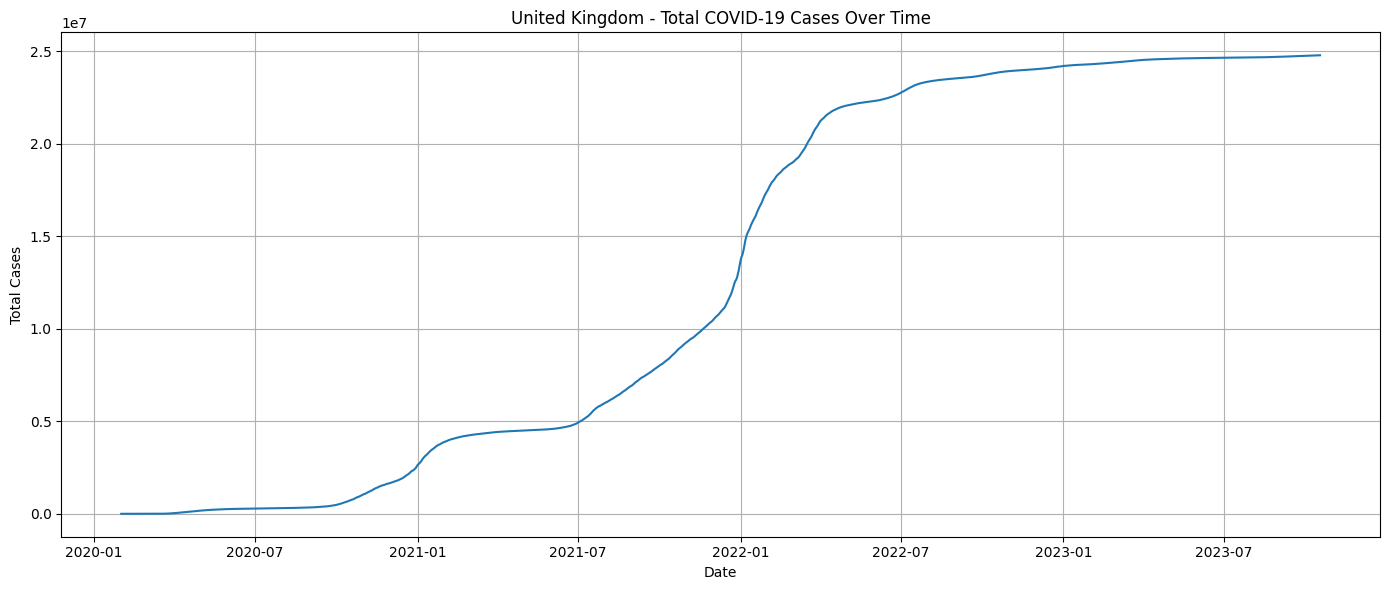

In [13]:
df_uk = df[df['location'] == 'United Kingdom'].copy()
df_uk = df_uk.sort_values('date')

df_uk[['total_cases', 'total_deaths', 'total_vaccinations']] = (
    df_uk[['total_cases', 'total_deaths', 'total_vaccinations']].ffill()
)

#Total Cases
plt.figure(figsize=(14,6))
sns.lineplot(data=df_uk, x='date', y='total_cases')
plt.title('United Kingdom - Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


***Cumulative COVID-19 Deaths in the United Kingdom Over Time***

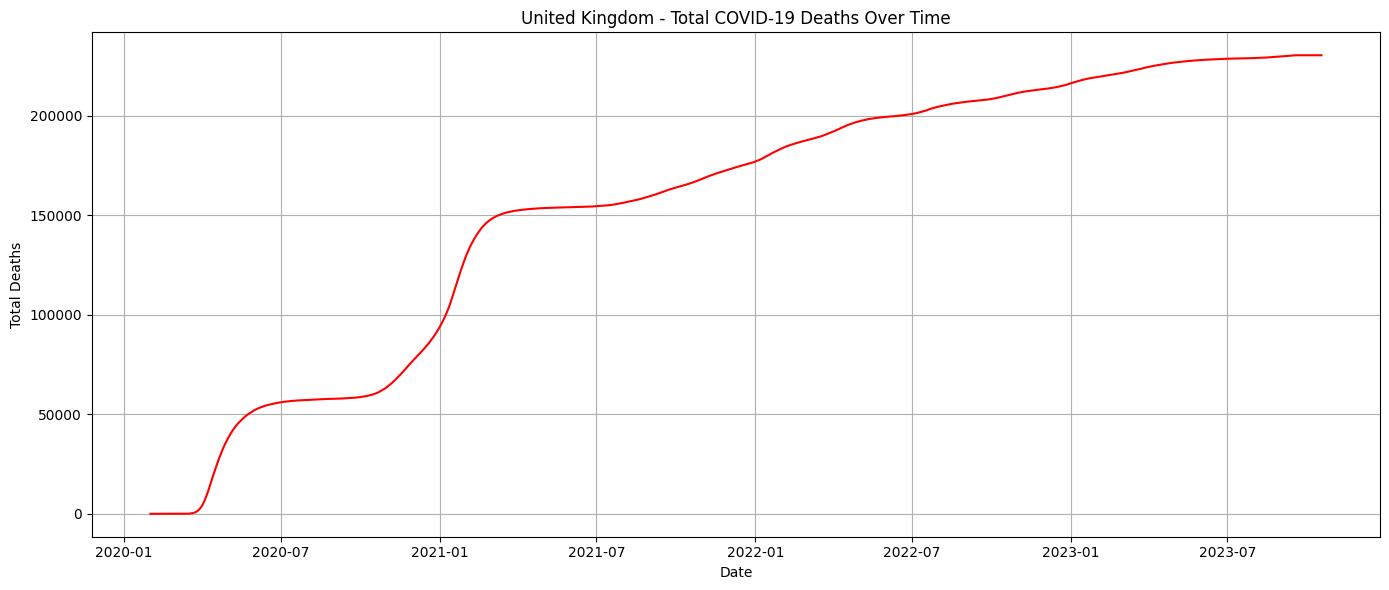

In [14]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_uk, x='date', y='total_deaths', color='red')
plt.title('United Kingdom - Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


***Total COVID-19 Vaccinations Administered in the UK Over Time***

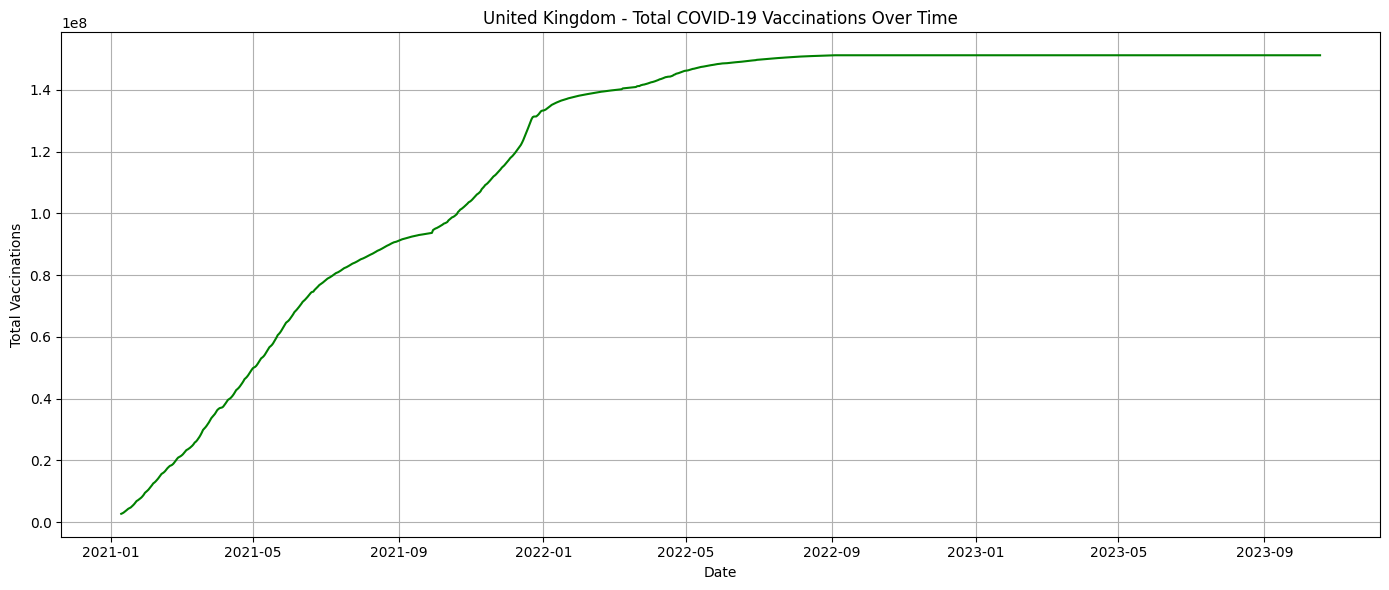

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_uk, x='date', y='total_vaccinations', color='green')
plt.title('United Kingdom - Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.tight_layout()
plt.show()


***Daily New COVID-19 Cases in the United Kingdom***


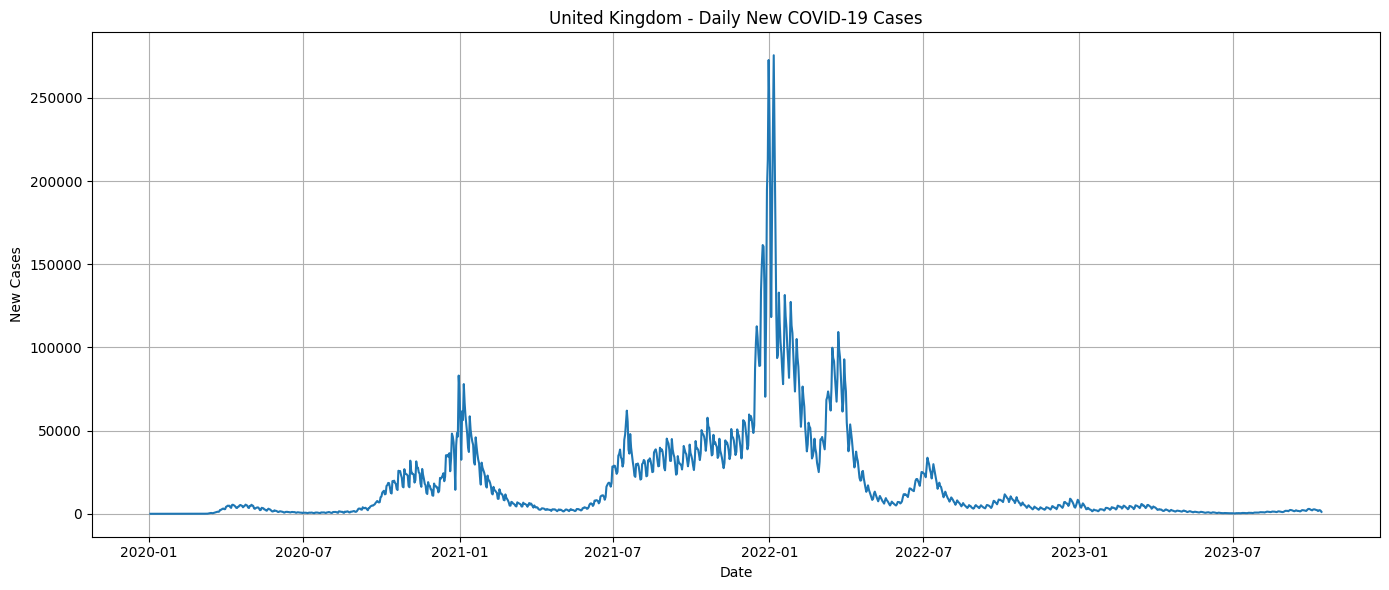

In [16]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_uk, x='date', y='new_cases')
plt.title('United Kingdom - Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


***Cumulative COVID-19 Cases in the United Kingdom (Logarithmic Scale)***

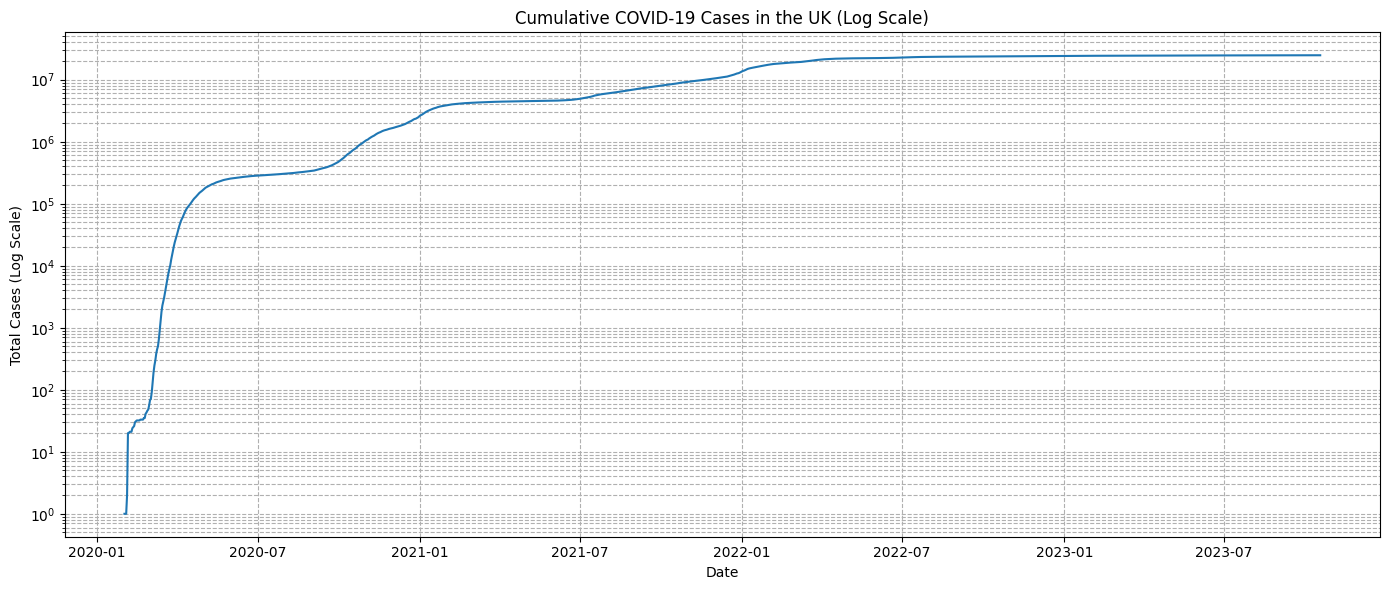

In [17]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_uk, x='date', y='total_cases')
plt.yscale('log')  # işte bu satır log ölçek yapar
plt.title('Cumulative COVID-19 Cases in the UK (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Total Cases (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


In [18]:
df_compare = df.copy()

df_compare[['total_cases', 'total_deaths', 'total_vaccinations']] = (
    df_compare.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].ffill()
)

df_compare['cases_per_100k'] = (df_compare['total_cases'] / df_compare['population']) * 100000
df_compare['deaths_per_100k'] = (df_compare['total_deaths'] / df_compare['population']) * 100000
df_compare['vaccinations_per_100k'] = (df_compare['total_vaccinations'] / df_compare['population']) * 100000

df_export = df_compare[['date', 'location', 'total_cases', 'total_deaths', 'total_vaccinations',
                        'cases_per_100k', 'deaths_per_100k', 'vaccinations_per_100k']]

df_export.to_csv('/kaggle/working/covid_data_tableau.csv', index=False)



In [19]:
# Filter for a specific date
df_filtered = df_export[df_export['date'] == '2021-12-31'].dropna()

# Calculate correlations
pearson_vacc_cases, _ = pearsonr(df_filtered['vaccinations_per_100k'], df_filtered['cases_per_100k'])
pearson_vacc_deaths, _ = pearsonr(df_filtered['vaccinations_per_100k'], df_filtered['deaths_per_100k'])

spearman_vacc_cases, _ = spearmanr(df_filtered['vaccinations_per_100k'], df_filtered['cases_per_100k'])
spearman_vacc_deaths, _ = spearmanr(df_filtered['vaccinations_per_100k'], df_filtered['deaths_per_100k'])

# Display results
print(f"📈 Pearson Correlation (Vaccination vs Cases): {pearson_vacc_cases:.3f}")
print(f"📉 Pearson Correlation (Vaccination vs Deaths): {pearson_vacc_deaths:.3f}")
print(f"📈 Spearman Correlation (Vaccination vs Cases): {spearman_vacc_cases:.3f}")
print(f"📉 Spearman Correlation (Vaccination vs Deaths): {spearman_vacc_deaths:.3f}")


📈 Pearson Correlation (Vaccination vs Cases): 0.591
📉 Pearson Correlation (Vaccination vs Deaths): 0.314
📈 Spearman Correlation (Vaccination vs Cases): 0.660
📉 Spearman Correlation (Vaccination vs Deaths): 0.435


In our analysis, we explored the relationship between countries’ vaccination rates and their total COVID-19 cases and deaths. Based on the correlation results:

There is a moderate positive relationship between vaccination rates and total case numbers. This may seem surprising at first, but it can be explained by the fact that countries with higher vaccination rates also tend to have better testing capacity, more accurate data tracking, and stronger healthcare systems. So, higher case counts in these countries might reflect more thorough reporting, not necessarily worse control of the virus.

The relationship between vaccination rates and total deaths is weaker but still positive. While vaccines are known to significantly reduce the risk of death at the individual level, differences between countries — such as healthcare quality, population age, or when vaccines became widely available — can make this correlation less pronounced in cross-country data.



### 📊 Tableau Dashboard

You can explore the interactive version of this dashboard via Tableau Public here:  
👉 [View Dashboard on Tableau Public](https://public.tableau.com/app/profile/necla.cakir/vizzes)


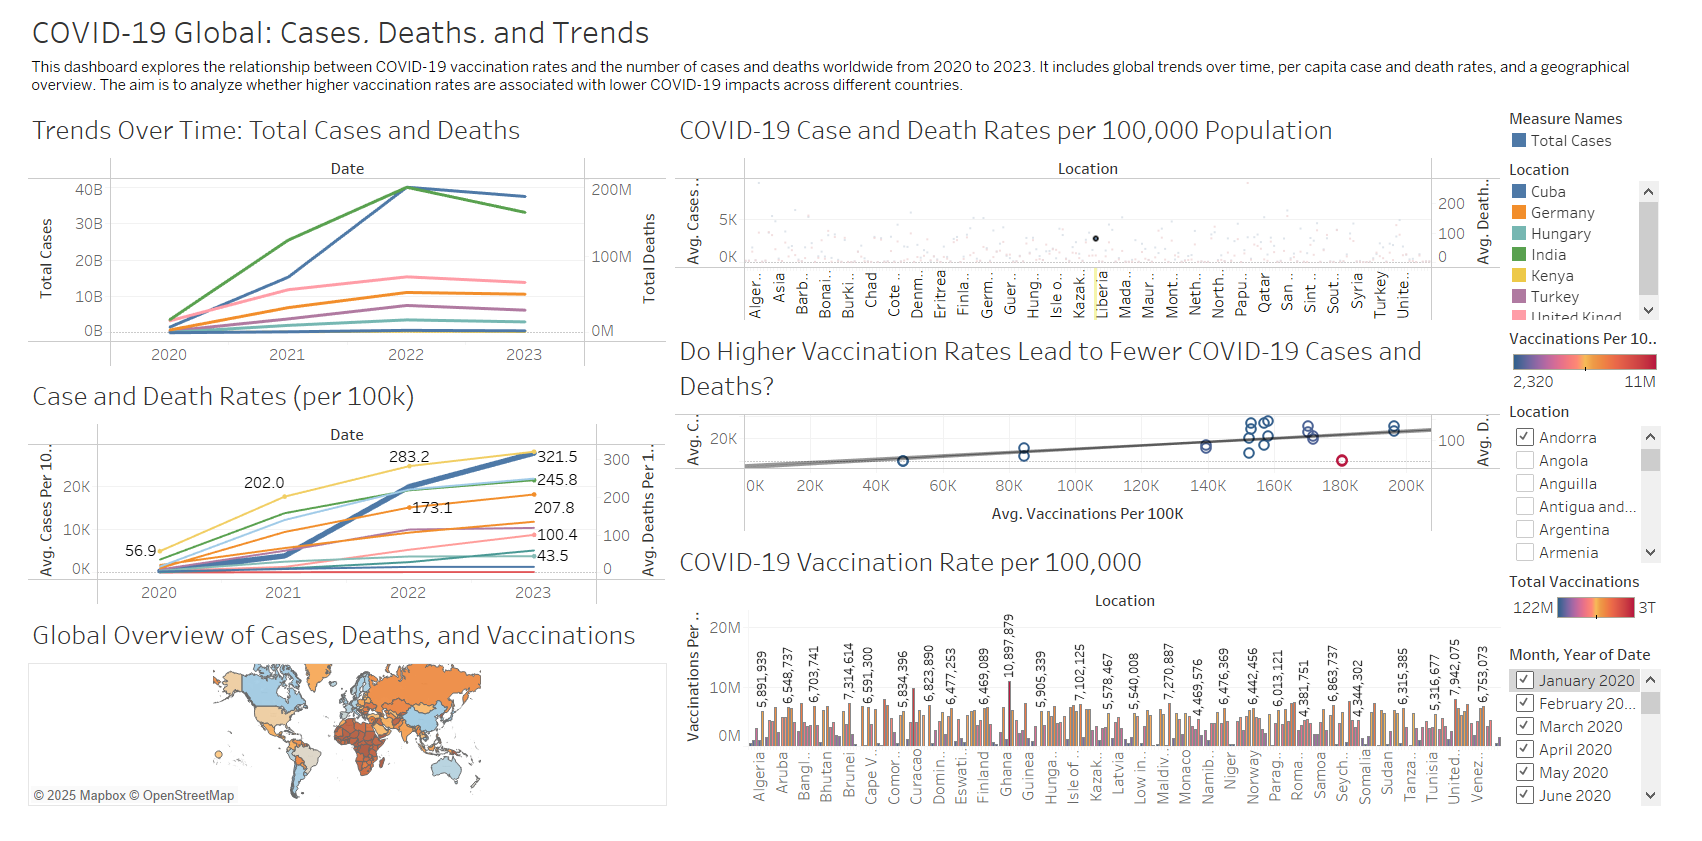

This dashboard presents a global analysis of COVID-19 data from 2020 to 2023.
It includes interactive visualizations comparing case rates, death rates, and vaccination coverage across different countries.
Users can explore correlations between vaccination rates and COVID-19 outcomes, view trends over time, and examine geospatial patterns using map views and filters.
The goal is to provide insights into the impact of vaccination efforts worldwide and the progression of the pandemic on a global scale.